# Initial Data Analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn import neighbors, tree, naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from david.textToSpeech import say

In [22]:
X_train_s = np.load('data/X_train_s.npy')
X_test_s = np.load('data/X_test_s.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

In [23]:
X_train_s.shape

(103589, 27)

In [6]:
# models
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
knnclf = neighbors.KNeighborsClassifier(5, weights='distance')
ldclf = LinearDiscriminantAnalysis()
nbclf = naive_bayes.GaussianNB()
rfclf = RandomForestClassifier(random_state=33)

# Decision Tree

In [7]:
tree = tree.DecisionTreeClassifier()

# parameter values to be optimized for
parameters = {
    #'criterion': ['entropy', 'gini'],
#    'max_depth': [None, 16,32,64, 80, 90 ,100,110,120],
#    'min_samples_split' : [50,64,70,80,90],
#    'min_samples_leaf' : [1,2,3,4],
    'n_estimators': [5, 10, 20, 30, 40, 50, 80, 100],
    'class_weight' : ['balanced'] #None, 
}

# GridSearch finds the best combination of paramters
tree_gs = GridSearchCV(rfclf, parameters, verbose=3, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=False)

In [8]:
tree_gs.fit(X_train_s, y_train) # performs gridsearch

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   46.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=33), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'n_estimators': [5, 10, 20, 30, 40, 50, 80, 100]},
             scoring='accuracy', verbose=3)

In [9]:
print(tree_gs.best_params_)
print("RMSE (test): {:.4f}".format(tree_gs.best_score_))

{'class_weight': 'balanced', 'n_estimators': 80}
RMSE (test): 0.9630


In [10]:
say('The task is complete.')

In [11]:
measure_performance(X_test_s, y_test, tree_gs, show_confussion_matrix=True, show_classification_report=True)

NameError: name 'measure_performance' is not defined

# KNN

In [19]:
knn = neighbors.KNeighborsClassifier()

# parameter values to be optimized for
parameters = {
    'n_neighbors' : [*range(1, 21)],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# GridSearch finds the best combination of paramters
knn_gs = GridSearchCV(knn, parameters, verbose=3, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=False)

In [20]:
knn_gs.fit(X_train_s, y_train) # performs gridsearch

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 33.9min


KeyboardInterrupt: 

In [ ]:
print(knn_gs.best_params_)
print("RMSE (test): {:.4f}".format(knn_gs.best_score_))

In [41]:
say('The task is complete.')

n_neighbors = 1 Train = 1.0 Test = 0.727355247852284
n_neighbors = 2 Train = 0.8623092232240819 Test = 0.7323654254368848
n_neighbors = 3 Train = 0.8683885350281892 Test = 0.744104106697568
n_neighbors = 4 Train = 0.832209502693955 Test = 0.7471739434822758
n_neighbors = 5 Train = 0.8328780083196099 Test = 0.7484578437399012
n_neighbors = 6 Train = 0.8145942154492761 Test = 0.7493363017863833
n_neighbors = 7 Train = 0.8141404959546144 Test = 0.7496452240279894
n_neighbors = 8 Train = 0.8018877474481536 Test = 0.7496645169318786
n_neighbors = 9 Train = 0.8014171383624067 Test = 0.7496452286876608
n_neighbors = 10 Train = 0.793189912858083 Test = 0.7495100590728457
n_neighbors = 11 Train = 0.7929437483537466 Test = 0.750214779403486
n_neighbors = 12 Train = 0.7861935142437255 Test = 0.74745387045199
n_neighbors = 13 Train = 0.7856022336160811 Test = 0.7479075947813414
n_neighbors = 14 Train = 0.7795301604369679 Test = 0.7457548428560035
n_neighbors = 15 Train = 0.778960603372486 Test = 0

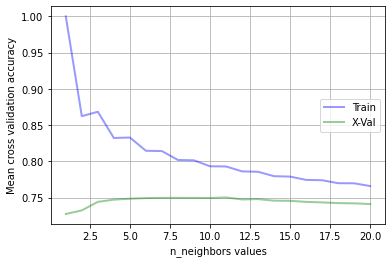

In [17]:
k = range(1,21)

train_scores, test_scores = calc_params(X_train, y_train, knn, k, 'n_neighbors', 5)
max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("Index {}".format(max_at))
print("{:.2f}".format(test_scores[max_at]))

In [58]:
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [60]:
tree_gs

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=33), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'n_estimators': [5, 10, 20, 30, 40, 50, 80, 100]},
             scoring='accuracy', verbose=3)

In [16]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    plt.grid(True)

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

min_samples_leaf = 1 Train = 0.9996428194046286 Test = 0.9612410816974473
min_samples_leaf = 2 Train = 0.9915917697892395 Test = 0.9617527080368239
min_samples_leaf = 3 Train = 0.9836227769015524 Test = 0.9612024688635741
min_samples_leaf = 4 Train = 0.9777437749685938 Test = 0.9610093907151936
min_samples_leaf = 5 Train = 0.9743722777502745 Test = 0.9604012243696924
min_samples_leaf = 6 Train = 0.971734450207306 Test = 0.9599378531224294
min_samples_leaf = 7 Train = 0.9696830739211636 Test = 0.9589628490122497
min_samples_leaf = 8 Train = 0.9681771232508936 Test = 0.9583932950346545
min_samples_leaf = 9 Train = 0.9665625702867799 Test = 0.9579685263699874
min_samples_leaf = 10 Train = 0.9651724609139325 Test = 0.9568487313552738
min_samples_leaf = 11 Train = 0.9644339654497562 Test = 0.9570707567809297
min_samples_leaf = 12 Train = 0.9630221346396445 Test = 0.956028181842357
min_samples_leaf = 13 Train = 0.9624984311599618 Test = 0.9556516934320294
min_samples_leaf = 14 Train = 0.9613

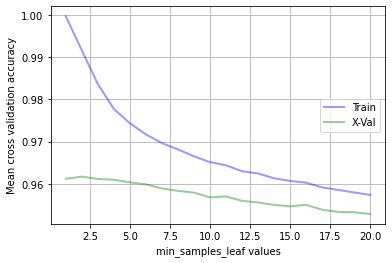

In [113]:
rf = RandomForestClassifier(n_estimators=30, random_state=33, n_jobs=-1)

msl = range(1,21)

train_scores, test_scores = calc_params(X_train, y_train, rf, msl, 'min_samples_leaf', 5)
max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("Index {}".format(max_at))
print("{:.2f}".format(test_scores[max_at]))

n_estimators = 1 Train = 0.9727118732398938 Test = 0.9253105961121015
n_estimators = 2 Train = 0.9749104648576401 Test = 0.9345780094081843
n_estimators = 3 Train = 0.9903295742235205 Test = 0.9481122582709787
n_estimators = 4 Train = 0.9896176243546082 Test = 0.9502843263985632
n_estimators = 5 Train = 0.9947533043938837 Test = 0.9535182427979896
n_estimators = 6 Train = 0.9939279274033245 Test = 0.9551979602493024
n_estimators = 7 Train = 0.9966864241875613 Test = 0.9563177734367345
n_estimators = 8 Train = 0.9959986106014925 Test = 0.9576403191459336
n_estimators = 9 Train = 0.9977290062026357 Test = 0.9581229944802976
n_estimators = 10 Train = 0.9971980624088891 Test = 0.95860566841676
n_estimators = 11 Train = 0.9982623641721584 Test = 0.9589628466824138
n_estimators = 12 Train = 0.9978424355957898 Test = 0.9595613665759704
n_estimators = 13 Train = 0.9986629856617697 Test = 0.9595613614503318
n_estimators = 14 Train = 0.9983082183685175 Test = 0.9600440428422686
n_estimators = 15

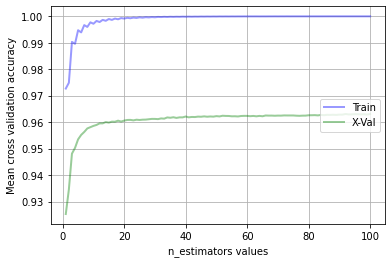

In [112]:
rf = RandomForestClassifier(n_estimators=30, random_state=33, n_jobs=-1)

n_est = range(1,101)

train_scores, test_scores = calc_params(X_train, y_train, rf, n_est, 'n_estimators', 5)
max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("Index {}".format(max_at))
print("{:.2f}".format(test_scores[max_at]))

max_depth = 1 Train = 0.8565146858751502 Test = 0.8562685626459959
max_depth = 2 Train = 0.857723781542896 Test = 0.8574366798520925
max_depth = 3 Train = 0.890893338419367 Test = 0.8911467914273208
max_depth = 4 Train = 0.9051974651631369 Test = 0.9046424358436507
max_depth = 5 Train = 0.9202666329081028 Test = 0.9196826378817882
max_depth = 6 Train = 0.9289885981022481 Test = 0.9283804794935243
max_depth = 7 Train = 0.9344211301736147 Test = 0.9337671273157339
max_depth = 8 Train = 0.9391923888957482 Test = 0.9377443843351478
max_depth = 9 Train = 0.944093968320313 Test = 0.9416637221037524
max_depth = 10 Train = 0.9500791604098717 Test = 0.9464036065894706
max_depth = 11 Train = 0.9564601482584603 Test = 0.9507862997624551
max_depth = 12 Train = 0.9627976918637913 Test = 0.9547539154555634
max_depth = 13 Train = 0.9674579343492804 Test = 0.956433633372843
max_depth = 14 Train = 0.972769793102314 Test = 0.9585863596699877
max_depth = 15 Train = 0.9772417924311034 Test = 0.95990889745

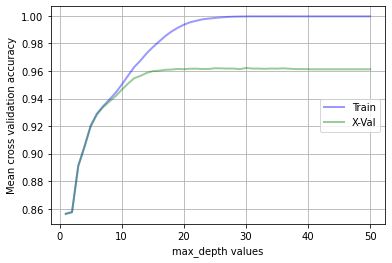

In [114]:
rf = RandomForestClassifier(n_estimators=30, random_state=33, n_jobs=-1)

n_est = range(1,51)

train_scores, test_scores = calc_params(X_train, y_train, rf, n_est, 'max_depth', 5)
max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("Index {}".format(max_at))
print("{:.2f}".format(test_scores[max_at]))

min_samples_split = 2 Train = 0.9971980624088891 Test = 0.95860566841676
min_samples_split = 3 Train = 0.9957114178352316 Test = 0.9594262100082354
min_samples_split = 4 Train = 0.9936721080596854 Test = 0.9586539193151692
min_samples_split = 5 Train = 0.9914445546906109 Test = 0.9589724959301614
min_samples_split = 6 Train = 0.9894317943835398 Test = 0.9592041720014663
min_samples_split = 7 Train = 0.9871318375826059 Test = 0.9588759549921025
min_samples_split = 8 Train = 0.9858117172037449 Test = 0.9590400630308172
min_samples_split = 9 Train = 0.9839799597975535 Test = 0.9593586326563022
min_samples_split = 10 Train = 0.9825777839432319 Test = 0.9590111041043631
min_samples_split = 11 Train = 0.981694484265429 Test = 0.9595420438501835
min_samples_split = 12 Train = 0.980446765833211 Test = 0.9598027007483987
min_samples_split = 13 Train = 0.9791821529756733 Test = 0.9594165696138639
min_samples_split = 14 Train = 0.9782843739802278 Test = 0.9600536874303446
min_samples_split = 15 T

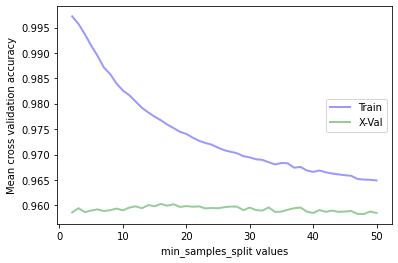

In [91]:
rf = RandomForestClassifier(n_estimators=30, random_state=33, n_jobs=-1)

n_est = range(2,51)

train_scores, test_scores = calc_params(X_train, y_train, rf, n_est, 'min_samples_split', 5)
max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("Index {}".format(max_at))
print("{:.2f}".format(test_scores[max_at]))

min_samples_leaf = 2 Train = 0.9915893563997547 Test = 0.9617623614782758
min_samples_leaf = 3 Train = 0.9836227769015524 Test = 0.9612024688635741
min_samples_leaf = 4 Train = 0.9777437749685938 Test = 0.9610093907151936
min_samples_leaf = 5 Train = 0.9743722777502745 Test = 0.9604012243696924
min_samples_leaf = 6 Train = 0.971734450207306 Test = 0.9599378531224294
min_samples_leaf = 7 Train = 0.9696830739211636 Test = 0.9589628490122497
min_samples_leaf = 8 Train = 0.9681771232508936 Test = 0.9583932950346545
min_samples_leaf = 9 Train = 0.9665625702867799 Test = 0.9579685263699874
min_samples_leaf = 10 Train = 0.9651724609139325 Test = 0.9568487313552738
min_samples_leaf = 11 Train = 0.9644339654497562 Test = 0.9570707567809297
min_samples_leaf = 12 Train = 0.9630221346396445 Test = 0.956028181842357
min_samples_leaf = 13 Train = 0.9624984311599618 Test = 0.9556516934320294
min_samples_leaf = 14 Train = 0.9613665542290196 Test = 0.9550724836831467
min_samples_leaf = 15 Train = 0.960

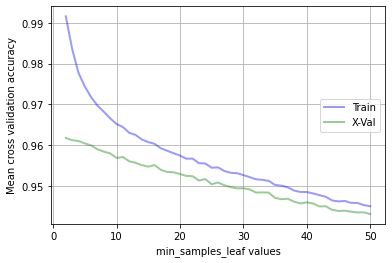

In [111]:
rf = RandomForestClassifier(n_estimators=30, random_state=33, n_jobs=-1)

n_est = range(2,11)

train_scores, test_scores = calc_params(X_train, y_train, rf, n_est, 'min_samples_leaf', 5)
max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("Index {}".format(max_at))
print("{:.2f}".format(test_scores[max_at]))

max_leaf_nodes = 2 Train = 0.8565146858751502 Test = 0.8562685626459959
max_leaf_nodes = 3 Train = 0.8543402144649631 Test = 0.8542317223791203
max_leaf_nodes = 4 Train = 0.8534279704216019 Test = 0.8530828952811103
max_leaf_nodes = 5 Train = 0.8615417539229918 Test = 0.861133983341665
max_leaf_nodes = 6 Train = 0.8732901085410099 Test = 0.8732395177439429
max_leaf_nodes = 7 Train = 0.877675232604623 Test = 0.877757357233385
max_leaf_nodes = 8 Train = 0.8861293199821757 Test = 0.8862041935244891
max_leaf_nodes = 9 Train = 0.8912529335399771 Test = 0.8909730299471542
max_leaf_nodes = 10 Train = 0.8953918900996992 Test = 0.8949309698323875
max_leaf_nodes = 11 Train = 0.9001969333915534 Test = 0.8998542878784102
max_leaf_nodes = 12 Train = 0.9027720146425947 Test = 0.9022193945471676
max_leaf_nodes = 13 Train = 0.9048258036775403 Test = 0.904304562131065
max_leaf_nodes = 14 Train = 0.9059118281303153 Test = 0.9054243692609243
max_leaf_nodes = 15 Train = 0.9089720016870801 Test = 0.9086775

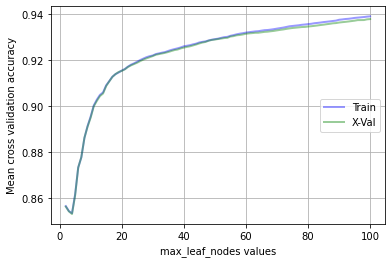

In [109]:
rf = RandomForestClassifier(n_estimators=30, random_state=33, n_jobs=-1)

n_est2 = range(2,101)

train_scores, test_scores = calc_params(X_train, y_train, rf, n_est2, 'max_leaf_nodes', 5)
max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("Index {}".format(max_at))
print("{:.2f}".format(test_scores[max_at]))

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])